In [1]:
import  numpy as np
import matplotlib.pyplot as plt
import pyneb as pn

In [7]:
O3 = pn.Atom('O',3)
O3.printIonic(tem=1e4, den=1e2)

elem = O
spec = 3
temperature = 10000.0 K
density =  100.0 cm-3

Level   Populations  Critical densities
Level 1:  7.816E-01  0.000E+00
Level 2:  1.939E-01  5.009E+02
Level 3:  2.448E-02  3.530E+03
Level 4:  4.309E-06  6.912E+05
Level 5:  2.972E-10  2.423E+07

     88.33m 
    (2-->1) 
  1.132E-21 

     32.65m      51.80m 
    (3-->1)     (3-->2) 
  4.512E-28   9.040E-22 

   4931.23A    4958.91A    5006.84A 
    (4-->1)     (4-->2)     (4-->3) 
  4.030E-25   1.172E-21   3.497E-21 

   2314.87A    2320.95A    2331.40A    4363.21A 
    (5-->1)     (5-->2)     (5-->3)     (5-->4) 
  0.000E+00   5.734E-24   1.771E-26   2.279E-23 

# H-beta volume emissivity:
1.235E-25 N(H+) * N(e-)  (erg/s)


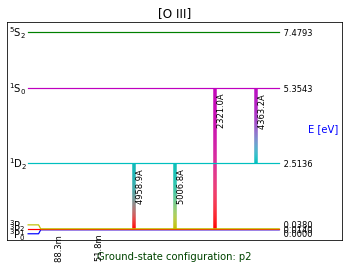

In [9]:
O3.plotGrotrian()

In [5]:
try:
    import ai4neb
except:
    !pip install -U git+https://github.com/morisset/AI4neb.git

In [10]:
O3.ANN_inst_kwargs['verbose'] = True

In [11]:
# Number of data points to test the ANN option speedup. 1,000 is good to see what's happening. 10,000 starts to really rock.
N_rand = 1000
# Define some ramdom values to test the 
ratio = 150.+ 10*np.random.randn(N_rand)
den =  150.+ 10*np.random.randn(N_rand)

In [12]:
import time

In [13]:
start = time.time()
res = O3.getTemDen(ratio, den=den, wave1=5007, wave2=4363)
end = time.time()
print(end-start)

3.5017058849334717


In [14]:
pn.config.use_multiprocs()

In [15]:
start = time.time()
res = O3.getTemDen(ratio, den=den, wave1=5007, wave2=4363)
end = time.time()
print(end-start)

1.9764859676361084


In [16]:
start = time.time()
res2 = O3.getTemDen(ratio, den=den, wave1=5007, wave2=4363, method='ANN')
end = time.time()
print(end-start)

Instantiation. V 0.17
Training set size = 900, Test set size = 0
Train data scaled. Log10 applied. 
Test data scaled. 
Training set size = 900, Test set size = 0
Training set size = 900, Test set size = 0
Regression Model SK_ANN
Training 2 inputs for 1 outputs with 900 data
RM trained, with 356 iterations. Score = 1.000
MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=20000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=1e-06, validation_fraction=0.1, verbose=False,
             warm_start=False)
Training time 0.2 s.
Test data scaled. Log10 applied. 
Training set size = 900, Test set size = 1000
Predicting from 2 inputs to 1 outputs using 1000 data i